In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
from scope.utils import read_parquet
from scope.utils import read_hdf

2023-08-12 14:44:54.049680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
field_296_dnn = read_parquet('') #insert string filepath to dnn preds
field_296_xgb = read_parquet('') #insert string filepath to xgb preds
training_set = read_parquet('') #insert string filepath to training set

In [26]:
classifications = [] # create a list of the 44 classifications in alphabetical order
for entry in field_296_dnn.columns:
    if '_dnn' in entry:
        classifications.append(entry.replace('_dnn',''))
classifications.sort()
classifications

['agn',
 'bis',
 'blend',
 'blher',
 'blyr',
 'bogus',
 'bright',
 'ceph',
 'ceph2',
 'cv',
 'dip',
 'dp',
 'dscu',
 'e',
 'ea',
 'eb',
 'el',
 'emsms',
 'ew',
 'ext',
 'fla',
 'hp',
 'i',
 'longt',
 'lpv',
 'mir',
 'mp',
 'osarg',
 'pnp',
 'puls',
 'rrab',
 'rrblz',
 'rrc',
 'rrd',
 'rrlyr',
 'rscvn',
 'saw',
 'sin',
 'srv',
 'vnv',
 'wp',
 'wuma',
 'wvir',
 'yso']

In [27]:
train_cols = [] #list of training set column names
for column in training_set.columns:
    train_cols.append(column)
    
while len(train_cols) > 53: #loop to remove column names that don't correspond to classifications (e.g. ID column, features)
    train_cols.pop(0) #this works for the particular training file I was working with since the classifications were the last 53 columns

train_cols

['variable',
 'YSO',
 'periodic',
 'pulsator',
 'RR Lyrae',
 'Cepheid',
 'multi periodic',
 'sinusoidal',
 'non-variable',
 'bogus',
 'bright star',
 'long timescale',
 'irregular',
 'blend',
 'extended',
 'eclipsing',
 'EW',
 'flaring',
 'ccd artifact',
 'binary star',
 'detached eclipsing MS-MS',
 'W UMa',
 'RR Lyrae ab',
 'RR Lyrae c',
 'Delta Scu',
 'RR Lyrae d',
 'Cepheid type-II',
 'RS CVn',
 'EB',
 'Beta Lyr',
 'sawtooth',
 'RR Lyrae Blazhko',
 'EA',
 'dipping',
 'wrong period',
 'double period',
 'AGN',
 'RV Tau',
 'LPV',
 'Mira',
 'half period',
 'SRV',
 'W Virginis',
 'compact binary',
 'eclipsing WD+dM (NN Ser)',
 'F',
 'O',
 'BL Her',
 'OSARG',
 'eclipsing sdB+dM (HW Vir)',
 'ellipsoidal',
 'Redback pulsar',
 'CV']

In [25]:
counts_train = {} #dictionary w classifications as keys and num of sources > certain probability threshold as values
threshold = 0.7 #enter chosen threshold for positive classification

for column in train_cols:
    count = np.count_nonzero(training_set[column] > threshold)
    counts_train[column] = count
    
counts_train

{'variable': 125056,
 'YSO': 4108,
 'periodic': 107248,
 'pulsator': 26603,
 'RR Lyrae': 14917,
 'Cepheid': 1573,
 'multi periodic': 257,
 'sinusoidal': 2645,
 'non-variable': 45212,
 'bogus': 1640,
 'bright star': 106,
 'long timescale': 3961,
 'irregular': 5970,
 'blend': 360,
 'extended': 154,
 'eclipsing': 75049,
 'EW': 55251,
 'flaring': 4633,
 'ccd artifact': 18,
 'binary star': 66607,
 'detached eclipsing MS-MS': 5199,
 'W UMa': 55253,
 'RR Lyrae ab': 4293,
 'RR Lyrae c': 6251,
 'Delta Scu': 6475,
 'RR Lyrae d': 539,
 'Cepheid type-II': 281,
 'RS CVn': 1593,
 'EB': 3130,
 'Beta Lyr': 3017,
 'sawtooth': 1314,
 'RR Lyrae Blazhko': 85,
 'EA': 2073,
 'dipping': 64,
 'wrong period': 1694,
 'double period': 238,
 'AGN': 596,
 'RV Tau': 9,
 'LPV': 3359,
 'Mira': 248,
 'half period': 237,
 'SRV': 950,
 'W Virginis': 77,
 'compact binary': 18,
 'eclipsing WD+dM (NN Ser)': 10,
 'F': 19,
 'O': 6,
 'BL Her': 95,
 'OSARG': 2061,
 'eclipsing sdB+dM (HW Vir)': 7,
 'ellipsoidal': 931,
 'Redback

In [81]:
#this cell creates a dataframe from counts_train and reformats it to include only the 44 classifications with their standard abbreviations
counts_train_table = pd.DataFrame.from_dict(counts_train, orient = 'index', columns = ['count'])
counts_train_table = counts_train_table.drop(['non-variable', 'ccd artifact', 'RV Tau', 'compact binary', 'eclipsing WD+dM (NN Ser)', 'eclipsing sdB+dM (HW Vir)', 'F', 'O', 'Redback pulsar'])
counts_train_table = counts_train_table.reset_index(names = 'classification')
counts_train_table['classification'] = counts_train_table['classification'].map(lambda name: name.lower())
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table = counts_train_table.replace('binary star', 'bis').replace('beta lyr', 'blyr').replace('bl her', 'blher').replace('bright star', 'bright').replace('cepheid', 'ceph').replace('cepheid type-ii', 'ceph2').replace('delta scu', 'dscu').replace('detached eclipsing ms-ms', 'emsms').replace('dipping', 'dip').replace('double period', 'dp').replace('eclipsing', 'e').replace('ellipsoidal', 'el').replace('extended', 'ext').replace('flaring', 'fla').replace('half period', 'hp').replace('irregular', 'i').replace('long timescale', 'longt').replace('mira', 'mir').replace('multi periodic', 'mp').replace('periodic', 'pnp').replace('pulsator', 'puls').replace('rr lyrae ab', 'rrab').replace('rr lyrae blazhko', 'rrblz').replace('rr lyrae c', 'rrc').replace('rr lyrae d', 'rrd').replace('rr lyrae', 'rrlyr').replace('rs cvn', 'rscvn').replace('sawtooth', 'saw').replace('sinusoidal', 'sin').replace('variable', 'vnv').replace('wrong period', 'wp').replace('w uma', 'wuma').replace('w virginis', 'wvir')
counts_train_table = counts_train_table.sort_values('classification').reset_index(drop=True)
counts_train_table

,classification,count
0,agn,596
1,bis,66607
2,blend,360
3,blher,95
4,blyr,3017
5,bogus,1640
6,bright,106
7,ceph,1573
8,ceph2,281
9,cv,4435


In [83]:
counts = [] #list of count values in alphabetical order based on corresponding classification
for val in counts_train_table['count']:
    counts.append(val)

Text(0.5, 0, 'count (log scale)')

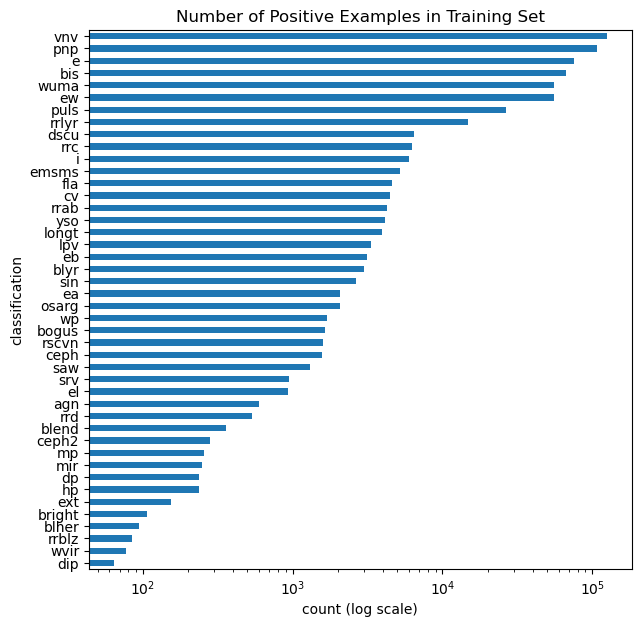

In [47]:
counts_train_table.plot.barh(x = 'classification', y = 'count', figsize = (7,7), title = 'Number of Positive Examples in Training Set', legend = None)
plt.xscale('log')
plt.xlabel('count (log scale)')

In [7]:
def hist_plot(classif): #function to make histogram of dnn vs xgb predictions for a particular classification
    classif_dnn = field_296_dnn[classif + '_dnn']
    classif_xgb = field_296_xgb[classif + '_xgb']
    plot = plt.hist(classif_dnn, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'dnn') + plt.hist(classif_xgb, bins = 55, range = (0, 1.1), alpha = 0.5, label = 'xgb')
    plt.legend()
    plt.xlabel(classif + ' Classification Probability')
    plt.ylabel('Number of Sources')

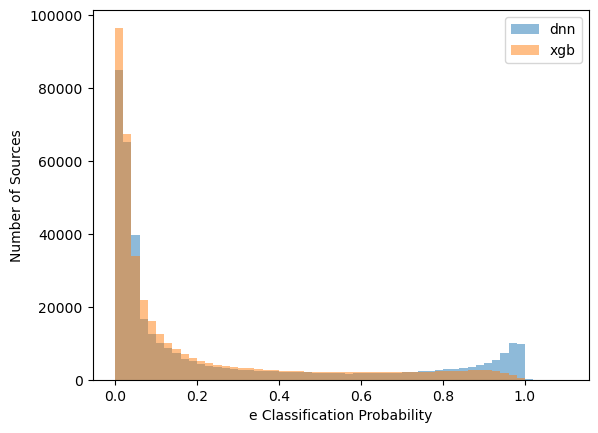

In [12]:
hist_plot('e') #input whichever classification you want
#adjust plot as desired, for example plt.yscale('log') to get logarithmic scale

In [48]:
#new dataframe containing dnn AND xgb preds
dnn_xgb_preds = pd.merge(field_296_dnn, field_296_xgb, on = '_id')

In [95]:
#function to make a scatter plot comparing dnn and xgb predictions, with agreement stat
def class_compare(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    plt.scatter(table['dnn'], table['xgb'], alpha = 0.01)
    plt.xlabel('dnn probability')
    plt.ylabel('xgb probability')
    plt.plot([threshold, threshold], [0,1], color = 'orange')
    plt.plot([0,1], [threshold, threshold], color = 'orange')
    table['new'] = np.where(((table['dnn'] < threshold) & (table['xgb'] < threshold)) | ((table['dnn'] >= threshold) & (table['xgb'] >= threshold)), 'Agree', 'Disagree')
    count_agree = 0
    for row in table['new']:
        if row == 'Agree':
            count_agree += 1
    agreement = str(count_agree / 380571)
    plt.suptitle(classif + ' predictions, DNN vs. XGB')
    plt.title('percent agreement = ' + agreement)
    plt.tight_layout()

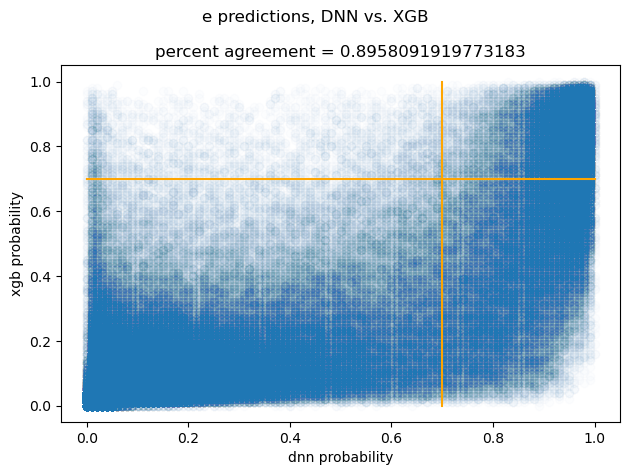

In [96]:
class_compare('e') #insert whichever classification

In [76]:
#function to compare dnn and xgb preds in a 2d histogram/heat map
def heatmap(classif):
    table = pd.DataFrame(columns = ['dnn', 'xgb'])
    table['dnn'] = dnn_xgb_preds[classif + '_dnn']
    table['xgb'] = dnn_xgb_preds[classif + '_xgb']
    heat_plot = plt.hist2d(table['dnn'], table['xgb'], bins = 25, norm = mpl.colors.LogNorm(), cmap = mpl.cm.YlOrRd)
    plt.title(classif + ' predictions, DNN vs. XGB')
    plt.xlabel('dnn probability')
    plt.ylabel('xgb probability')
    plt.tight_layout()
    plt.colorbar()

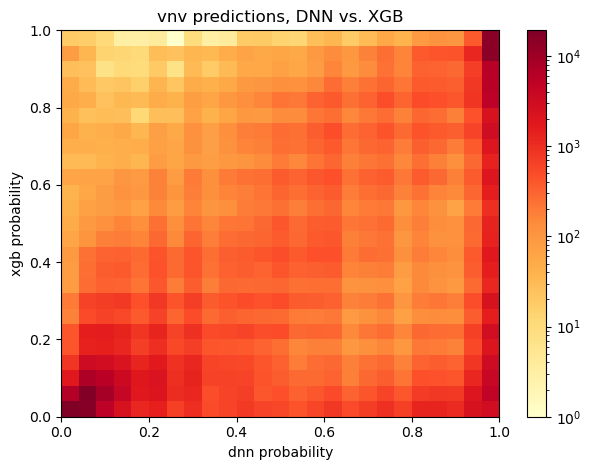

In [77]:
heatmap('vnv')

In [13]:
import json

In [14]:
dnn_stats = {} #dictionary with classifications as keys and dnn CM stats as values 
for classif in classifications:
    with open('/Users/leighannazielske/Desktop/DR16_DNN_stats/' + classif + '/' + classif + '_plots/val/' + classif + '_stats.json') as classif_stats: #change to appropriate filepath
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        dnn_stats.update(new)

In [15]:
xgb_stats = {} #dictionary with classifications as keys and xgb CM stats as values 
for classif in classifications:
    with open('/Users/leighannazielske/Desktop/DR16_XGB_stats/' + classif + '/' + classif + '_plots/val/' + classif + '_stats.json') as classif_stats: #change to appropriate filepath
        classif_stats = classif_stats.read()
        classif_stats = json.loads(classif_stats)
        new = {classif: classif_stats}
        xgb_stats.update(new)

In [18]:
#dataframes of confusion matrix stats (accuracy, precision, recall, f1 score, ROC area)
stats_dnn = pd.DataFrame.from_dict(dnn_stats, orient = 'index')
stats_xgb = pd.DataFrame.from_dict(xgb_stats, orient = 'index')

In [91]:
#dataframe of dnn precision and recall, sorted by num pos examples in training set
dnn_prec_rec = stats_dnn.drop(['accuracy', 'f1_score', 'roc_auc'], axis = 'columns')
dnn_prec_rec['count'] = counts
dnn_prec_rec = dnn_prec_rec.sort_values('count')
dnn_prec_rec = dnn_prec_rec.drop(['blher', 'bogus', 'bright', 'dip', 'dp', 'el', 'ext', 'hp', 'mp', 'rrblz', 'rrd', 'wp', 'wvir'])
dnn_prec_rec = dnn_prec_rec.drop(['count'], axis = 'columns')

In [90]:
#dataframe of xgb precision and recall, sorted by num pos examples in training set
xgb_prec_rec = stats_xgb.drop(['accuracy', 'f1_score', 'roc_auc'], axis = 'columns')
xgb_prec_rec['count'] = counts
xgb_prec_rec = xgb_prec_rec.sort_values('count')
xgb_prec_rec = xgb_prec_rec.drop(['blend', 'blher', 'bright', 'dip', 'dp', 'el', 'ext', 'hp', 'mp', 'rrblz', 'saw', 'wp', 'wvir'])
xgb_prec_rec = xgb_prec_rec.drop(['count'], axis = 'columns')

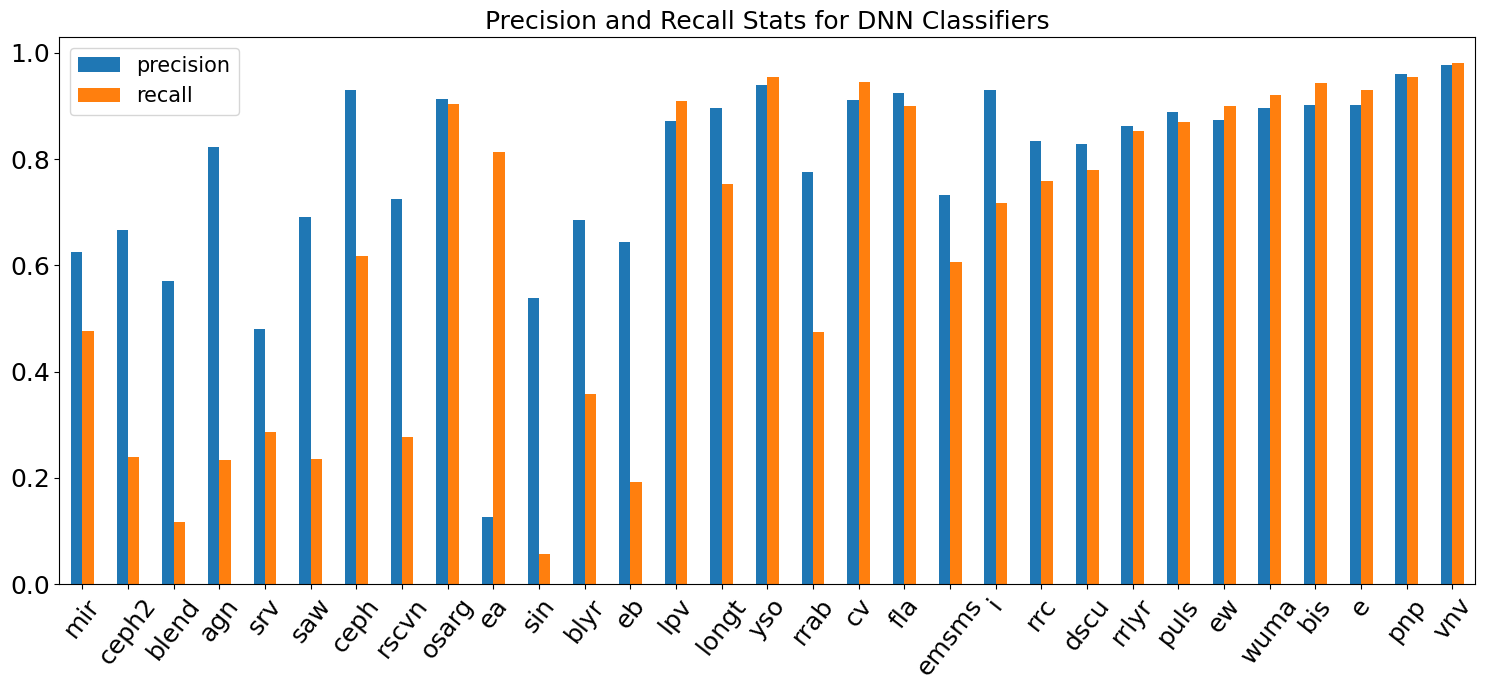

In [92]:
#dnn precision and recall plot
dnn_prec_rec.plot.bar(figsize = (15,7))
plt.xticks(rotation = 52, fontsize = 18)
plt.title('Precision and Recall Stats for DNN Classifiers', fontsize = 18)
plt.legend(fontsize = 15)
plt.yticks(fontsize = 18)
plt.tight_layout()

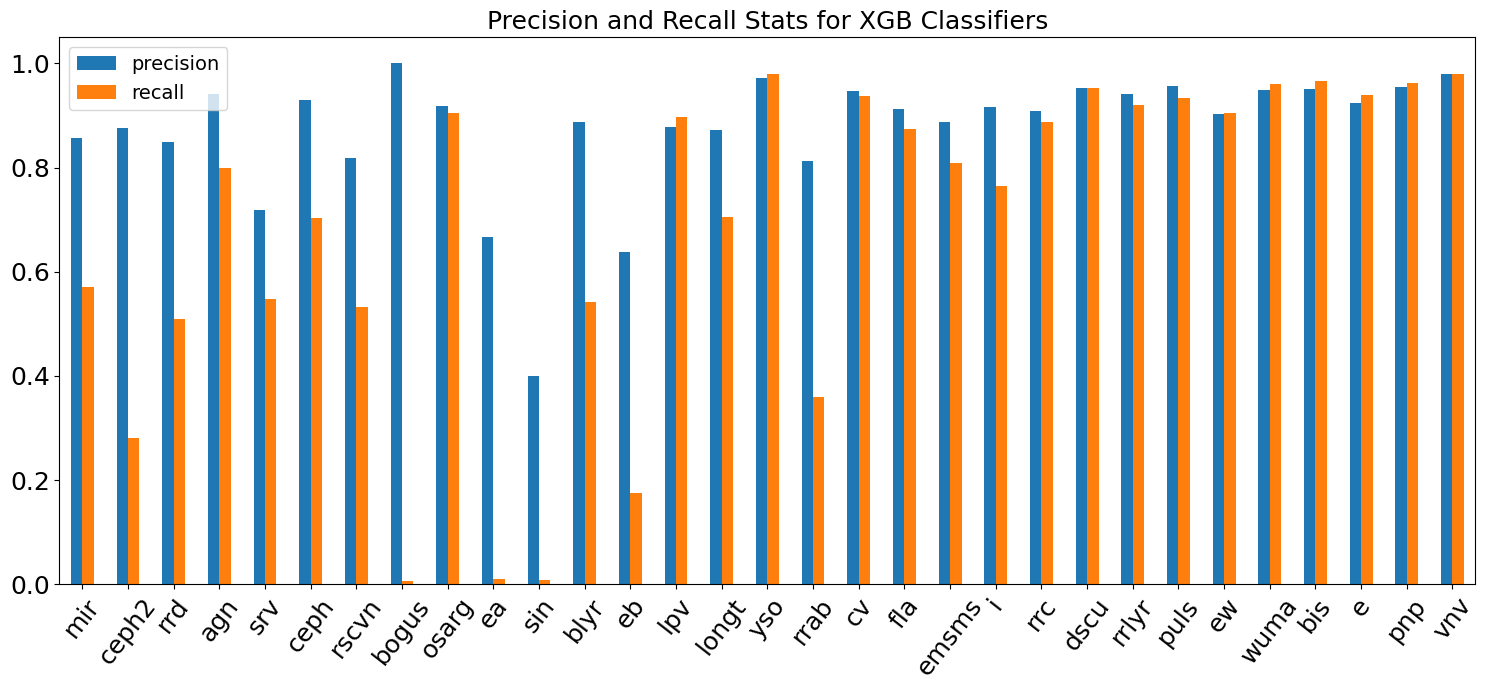

In [94]:
#xgb precision and recall plot
xgb_prec_rec.plot.bar(figsize = (15,7))
plt.xticks(rotation = 52, fontsize = 18)
plt.title('Precision and Recall Stats for XGB Classifiers', fontsize = 18)
plt.legend(fontsize = 14)
plt.yticks(fontsize = 18)
plt.tight_layout()